In [1]:
import numpy
# scipy.special for the sigmoid function expit()
import scipy.special
# library for plotting arrays
import matplotlib.pyplot
# ensure the plotting arrays
%matplotlib inline
import glob

# neural network class definition
class neuralNetwork :
    # initialize the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate) :
        # set number of nodes in each input, hidden, output, layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # link weight matrice, wih and who
        # weights inside the arrays are w_i_j, where link is from node i to j in the next layer
        # w11 ww21 w12 etc
        self.wih = numpy.random.normal(0.0, pow(self.hnodes,-0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.onodes,-0.5), (self.onodes, self.hnodes))
        
        # learning rate
        self.lr = learningrate
        
        # activation function is the sigmoid function
        self.activation_function = lambda x:scipy.special.expit(x)
        pass
    
    # train the neural network
    def train(self, inputs_list, targets_list) :
        #convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih,inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs) 
        
        #calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        # outout layer error is the(target-actual)
        output_errors = targets - final_outputs
        
        #hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = numpy.dot(self.who.T, output_errors)
        
        # update the weights for the links between the hidden and output layers
        self.who += self.lr*numpy.dot((output_errors*final_outputs*(1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        
        # update the weights for the links between the input and hidden layers
        self.wih += self.lr*numpy.dot((hidden_errors*hidden_outputs*(1.0 - hidden_outputs)), numpy.transpose(inputs))
        
        pass
    
    #query the neutral network
    def query(self, inputs_list) :
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        # calculate signals emerging from hidden layer
        hidden_inputs = numpy.dot(self.wih,inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        #calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        return final_outputs
        pass

In [2]:

# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 100
output_nodes = 10

# learning rate
learning_rate = 0.3

# create instance of neural network
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes,learning_rate)

# load the mnist training data CSV file into a list
training_data_file = open("mnist_dataset/mnist_train.csv",'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

# train the neural network

# go through all records in the training data set
for record in training_data_list:
    # split the records in the training_data_list
    all_values = record.split(',')
    # scale and shift the inputs
    inputs = (numpy.asfarray(all_values[1:])/255.0*0.99)+0.01
    # create the target output values (all 0.01, except the desired label which is 0.99)
    targets = numpy.zeros(output_nodes)+0.01
    targets[int(all_values[0])] = 0.99
    n.train(inputs,targets)
    pass

In [3]:
# load the mnist test data CSV file into a list
test_data_file = open("mnist_dataset/mnist_test.csv",'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [20]:
# get the first test record
all_values = test_data_list[1012].split(',')
print(all_values[0])

7


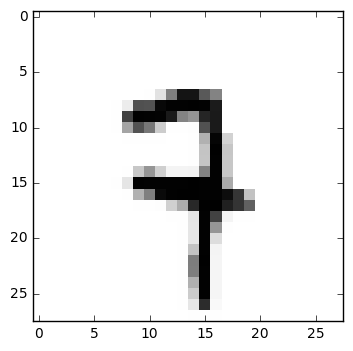

In [21]:
image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array,cmap='Greys',interpolation='None')

In [19]:
n.query((numpy.asfarray(all_values[1:])/255.0*0.99)+0.01)

array([[ 0.00205891],
       [ 0.98461339],
       [ 0.00510353],
       [ 0.0048404 ],
       [ 0.01043801],
       [ 0.00345798],
       [ 0.0035323 ],
       [ 0.00239175],
       [ 0.03295036],
       [ 0.00361967]])